Neste código, estão presentes as principais ferramentas utilizadas em Machine Learning, incluindo as bibliotecas Pandas, Numpy, Matplotlib e Scikit-Learn. O dataset utilizado, fornecido pela FIAP no curso de Data Analysis.

**Pandas**

In [1]:
# Instalando o Pandas

! pip install pandas


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Importando os dados**

In [2]:
import pandas as pd

In [3]:
#Importando um Excel
df_excel = pd.read_excel('Chess.xlsx', sheet_name='Chess')

In [4]:
#Importando um csv
df_csv = pd.read_csv('Tomato.csv', sep=",")

**Conhecendo os dados**

In [5]:
df_excel.head(3)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3


In [6]:
df_csv.head(3)

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato


**Conhecendo as dimensões dos dados**

In [7]:
df_csv.shape

(2741, 6)

In [8]:
df_csv.shape

(2741, 6)

**Analisando as informações dos dados**

In [9]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rated           20058 non-null  bool   
 1   created_at      20058 non-null  float64
 2   last_move_at    20058 non-null  float64
 3   turns           20058 non-null  int64  
 4   victory_status  20058 non-null  object 
 5   winner          20058 non-null  object 
 6   increment_code  20058 non-null  object 
 7   white_id        20058 non-null  object 
 8   white_rating    20058 non-null  int64  
 9   black_id        20058 non-null  object 
 10  black_rating    20058 non-null  int64  
 11  opening_eco     20058 non-null  object 
 12  opening_name    20058 non-null  object 
 13  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 2.0+ MB


In [13]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2741 non-null   object 
 1   Unit     2741 non-null   object 
 2   Minimum  2741 non-null   int64  
 3   Maximum  2741 non-null   int64  
 4   Average  2741 non-null   float64
 5   Market   2741 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 128.6+ KB


**Conhecendo o conteúdo dos dados da coluna**

In [14]:
set (df_excel['victory_status'])

{'draw', 'mate', 'outoftime', 'resign'}

**Adicionando colunas utilizando funções**

In [ ]:
# analisando os dados para criarmos uma nova coluna
df_csv.head(3)

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato


In [18]:
df_csv.describe()

,Minimum,Maximum,Average
count,2741.000000,2741.000000,2741.000000
mean,35.089748,41.281284,38.185516
std,16.648425,17.364135,16.970949
min,8.000000,12.000000,10.000000
25%,22.000000,30.000000,25.000000
50%,30.000000,38.000000,35.000000
75%,45.000000,50.000000,47.500000
max,115.000000,120.000000,117.500000


In [19]:
# Função que implementa a condição
def categorizar_media(media):
    if media >= 40 and media <= 70:
        return 'tomate medio'
    elif media < 40:
        return 'tomate pequeno'
    else:
        return 'tomate grande'

In [20]:
# Aplicando a função na coluna 'Average' usando o método apply
df_csv['categoria_tomate'] = df_csv['Average'].apply(categorizar_media)

In [21]:
# Agrupa os dados com base nos valores da coluna 'categoria_tomate'
df_csv.groupby(['categoria_tomate']).describe()

Minimum                                                      \
                   count       mean       std   min   25%   50%   75%    max   
categoria_tomate                                                               
tomate grande      149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   
tomate medio       954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
tomate pequeno    1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   

                 Maximum             ...              Average             \
                   count       mean  ...   75%    max   count       mean   
categoria_tomate                     ...                                   
tomate grande      149.0  82.583893  ...  85.0  120.0   149.0  79.164430   
tomate medio       954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
tomate pequeno    1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   

                                                           
                       std   min   25%   50%   75%    max  
categoria_tomate                                           
tomate grande     7.367396  70.5  75.0  77.5  82.5  117.5  
tomate medio      8.272792  40.0  45.0  50.0  57.5   70.0  
tomate pequeno    7.191735  10.0  21.5  27.5  32.5   39.5  

[3 rows x 24 columns]

**Filtrando dados no pandas**

In [26]:
filtro_tomate_pequeno = df_csv['Average'] < 40
df_csv.loc[filtro_tomate_pequeno]

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate pequeno
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate pequeno
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate pequeno
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate pequeno


**Numpy**

O NumPy é uma ferramenta utilizada para arrays multidimensionais e processamento de matrizes.

In [27]:
! pip install numpy


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import numpy as np

**Criando arrays:**

In [29]:

# Criando um array numpy a partir de uma lista
arr_list = np.array([1, 2, 3, 4, 5, 6, 7, 8])
print(arr_list)

[1 2 3 4 5 6 7 8]


In [32]:
# Criando um array numpy preenchido com zeros
arr_zeros = np.zeros((4, 6)) # matriz 4x6
print(arr_zeros)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [33]:
# Criando um array numpy preenchido com uns
arr_ones = np.ones((3, 4)) # matriz 3x4
print(arr_ones)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [35]:
# Criando um array numpy com valores aleatórios entre 0 e 1
arr_random = np.random.rand(3, 4) # matriz 3x4
print(arr_random)

[[0.54628722 0.04531904 0.5807793  0.72408914]
 [0.91642024 0.97520823 0.06227998 0.07820758]
 [0.50986463 0.86851527 0.98911197 0.58849756]]


In [36]:
# Criando um array numpy com valores espaçados uniformemente
arr_range = np.arange(0, 10, 2) # array de 0 a 10 com passo 2
print(arr_range)

[0 2 4 6 8]


**Manipulando arrays:**

In [37]:
# Obtendo a dimensão de um array
arr_dim = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9],  [10, 11, 12]])
print(arr_dim.shape) #4 linhas e 3 colunas

(4, 3)


In [38]:
arr_dim

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [39]:
# Concatenando dois arrays ao longo de um eixo
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])
arr3 = np.array([[9, 10], [11, 12]])
arr4 = np.concatenate((arr1, arr2, arr3), axis=1)
print(arr4)

[[ 1  2  5  6  9 10]
 [ 3  4  7  8 11 12]]


In [40]:
# Dividindo um array em vários sub-arrays
# Vamos utilizar o arr_dim

arr_dim

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [41]:
arr_split = np.split(arr_dim, 2)
print(arr_split)

[array([[1, 2, 3],
       [4, 5, 6]]), array([[ 7,  8,  9],
       [10, 11, 12]])]


In [42]:
# Transpondo um array
arr_dim_transpose = np.transpose(arr_dim)
print(arr_dim_transpose)

[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]


In [43]:
# Reverter o transpose
arr_transposed = arr_dim_transpose.T
print(arr_transposed)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


**Trabalhando com operações númericas**

In [44]:
# Somando dois arrays
arr_a = np.array([1, 7, 27])
arr_b = np.array([5, 5, 3])
arr_add_ab = np.add(arr_a, arr_b)
print(arr_add_ab)

[ 6 12 30]


**Matplotlib**

O Matplotlib é utilizado para a construção de gráficos.

In [49]:
! pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [51]:
tomates = df_csv
tomates.head(3)

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno


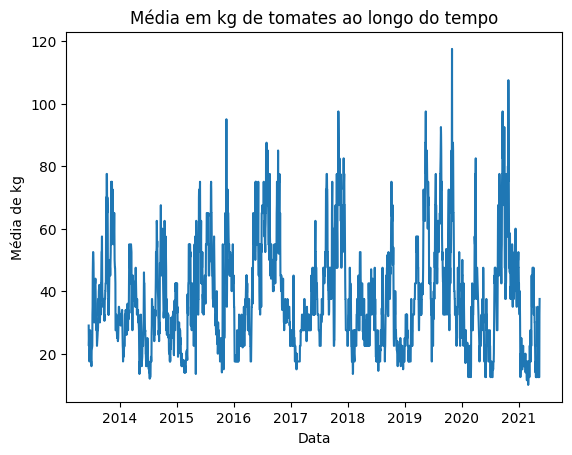

In [53]:
# Gráficos de linhas simples
tomates['Date'] = pd.to_datetime(tomates['Date'])

plt.plot(tomates['Date'], tomates['Average'])
plt.xlabel('Data')
plt.ylabel('Média de kg')
plt.title('Média em kg de tomates ao longo do tempo')
plt.show()

In [54]:
chess = df_excel
chess.head(3)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3


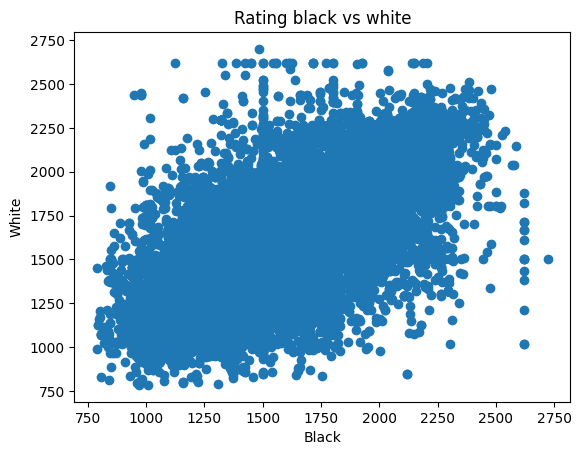

In [ ]:
# Gráfico de pontos

plt.scatter(chess['black_rating'], chess['white_rating'])
plt.xlabel('Black')
plt.ylabel('White')
plt.title('Rating black vs white')
plt.show()

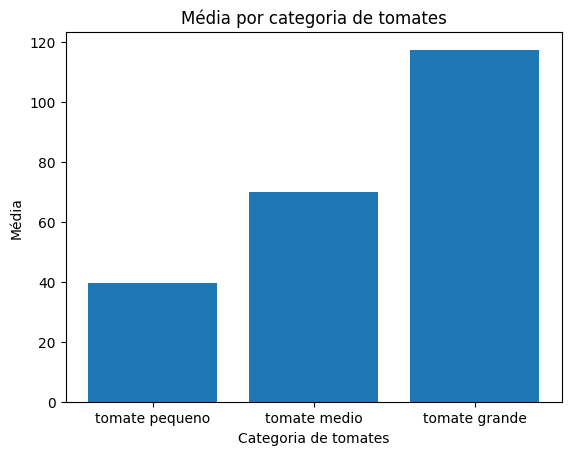

In [ ]:
# Gráfico de barras

plt.bar(tomates['categoria_tomate'], tomates['Average'])
plt.xlabel('Categoria de tomates')
plt.ylabel('Média')
plt.title('Média por categoria de tomates')
plt.show()

**Conhecendo o Scikit-Learn**

A biblioteca é utilizada para trabalhar com os principais algoritmos de Machine Learning e Deep Learning, oferecendo opções de ferramentas para transformações de dados.

In [57]:
! pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [60]:
diabetes = pd.read_csv('diabetes.csv', sep=',')

In [62]:
diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
# Separando os dados
x= diabetes.drop(['Class variable'],axis=1)
y = diabetes['Class variable']

In [64]:
# Dividindo o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [65]:
# Cria um classificador k-vizinhos (KNN) mais próximos com k=3
knn = KNeighborsClassifier(n_neighbors=3)

In [66]:
# Treina o classificador
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
# Testar o classificador
accuracy = knn.score(x_test, y_test)
print("Acurácia: {:.2f}%".format(round(accuracy,2) * 100))

Acurácia: 67.00%
